In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
kc = pd.read_csv('results_kc.csv')
kc = kc.drop(columns=['Unnamed: 0'])

poa = pd.read_csv('results_poa.csv')
poa = poa.drop(columns=['Unnamed: 0'])

metrics = ['MALE_test', 'RMSE_test', 'MAPE_test']#, 'MALE_train', 'RMSE_train', 'MAPE_train']

In [44]:
def create_results(df):
    results = {}
    results['original'] = {}
    for threshold in df['threshold'].unique():
        results[str(threshold)] = {}

    original = df[df['isMasked'] == False]
    ours = df[df['isMasked'] == True]

    for metric in metrics:
        results['original'][metric] = (original[metric].mean(), original[metric].std())
        for threshold in df['threshold'].unique():
            results[str(threshold)][metric] = (ours[ours['threshold'] == threshold][metric].mean(), ours[ours['threshold'] == threshold][metric].std())

    return results
    
kc_results = create_results(kc)
poa_results = create_results(poa)

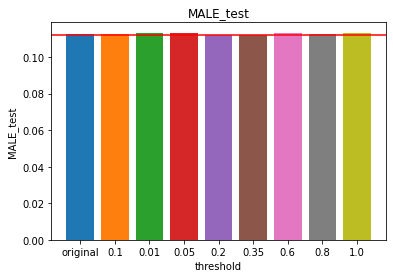

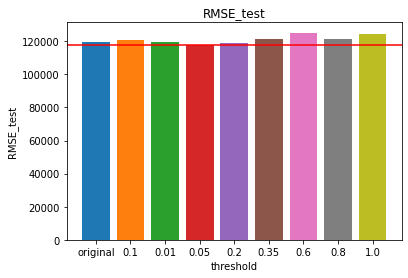

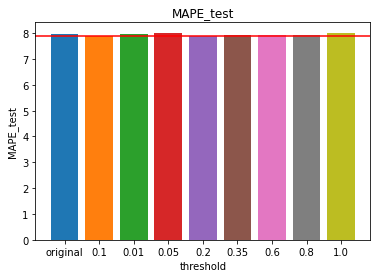

In [49]:
def plot(results):
    for metric in metrics:
        plt.figure()
        plt.title(metric)
        plt.xlabel('threshold')
        plt.ylabel(metric)
        for exp in results.keys():
            plt.bar(exp, results[exp][metric][0])
        # set horizontal line
        plt.axhline(y=np.min([results[e][metric][0] for e in results.keys()]), color='r', linestyle='-')

        # set y to log scale
        # plt.yscale('log')
        plt.show()

plot(kc_results)